In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
print(tf.__version__)
print(keras.__version__)

2.3.1
2.4.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [5]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [6]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ['Tshirt',"Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [8]:
class_names[y_train[0]]

'Coat'

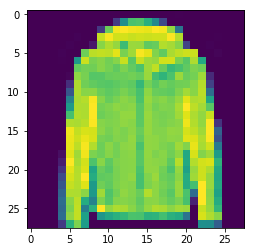

In [13]:
plt.imshow(X_train[0])

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [32]:
weights, biases = model.layers[1].get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [33]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [34]:
history = model.fit(X_train,y_train,epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7159 - accuracy: 0.7684 - val_loss: 0.5130 - val_accuracy: 0.8264
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4897 - accuracy: 0.8291 - val_loss: 0.4461 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4462 - accuracy: 0.8442 - val_loss: 0.4246 - val_accuracy: 0.8560
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4183 - accuracy: 0.8542 - val_loss: 0.4090 - val_accuracy: 0.8586
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3983 - accuracy: 0.8601 - val_loss: 0.4245 - val_accuracy: 0.8536
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3831 - accuracy: 0.8660 - val_loss: 0.3723 - val_accuracy: 0.8746
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3700 - accuracy: 0.8702 - val_loss: 0.3900 - val_accuracy:

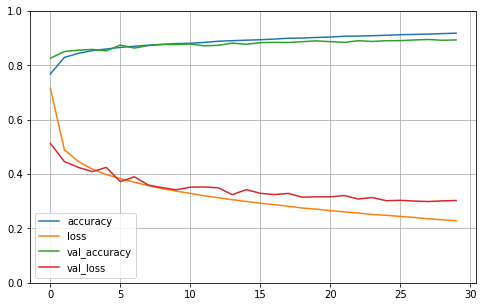

In [35]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 72.7720 - accuracy: 0.8369


[72.7719955444336, 0.836899995803833]

In [48]:
#Challenge 1: Can you improve test accuracy by adjusting the parameters of the model?

In [47]:
#Challenge 2: Can you implement this model on the MNIST data set? It can be obtained here: 
#https://keras.io/api/datasets/mnist/

In [39]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
housing = fetch_california_housing()

In [43]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [44]:
model = keras.models.Sequential([keras.layers.Dense(30,activation="relu", input_shape = X_train.shape[1:]), 
                                 keras.layers.Dense(1)])
model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(X_train,y_train,epochs=20,validation_data = (X_valid,y_valid))
mse_test = model.evaluate(X_test,y_test)

Epoch 1/20
363/363 [==============================] - 0s 952us/step - loss: 0.8263 - val_loss: 3.1858
Epoch 2/20
363/363 [==============================] - 0s 768us/step - loss: 0.6855 - val_loss: 1.6308
Epoch 3/20
363/363 [==============================] - 0s 800us/step - loss: 0.5921 - val_loss: 0.4627
Epoch 4/20
363/363 [==============================] - 0s 764us/step - loss: 0.4150 - val_loss: 0.4341
Epoch 5/20
363/363 [==============================] - 0s 754us/step - loss: 0.4038 - val_loss: 0.4443
Epoch 6/20
363/363 [==============================] - 0s 747us/step - loss: 0.4025 - val_loss: 0.4111
Epoch 7/20
363/363 [==============================] - 0s 799us/step - loss: 0.3847 - val_loss: 0.4069
Epoch 8/20
363/363 [==============================] - 0s 796us/step - loss: 0.3807 - val_loss: 0.4094
Epoch 9/20
363/363 [==============================] - 0s 779us/step - loss: 0.3762 - val_loss: 0.4071
Epoch 10/20
363/363 [==============================] - 0s 807us/step - loss: 0.371

In [46]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)

[[2.7639568]
 [2.6109774]
 [1.2902279]]


In [306]:
#Challenge 3: The Universal Approxmation Theorem says that any continuous function can be approximated 
#arbitrarily well by a neural network. Let's try a simple example: a quadratic! You may observe how stochastic this
#pipeline is -- you'll get wildly different results running the same network/data a few times. Anyhow, try adding 
# more layers, or more neurons per layer, and see what gives the best approximations. When you've tried that, move 
#on to a 2D Gaussian curve np.exp(-x**2 - y**2), and plot the results.

In [303]:
T = list(np.linspace(-1,1,100))
N = [t**2 for t in T]
model = keras.models.Sequential()
model.add(keras.layers.Dense(20,activation = "relu", input_shape = [1]))
model.add(keras.layers.Dense(10,activation = "relu"))
model.add(keras.layers.Dense(1,activation = "relu"))

opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss = "mean_squared_error", optimizer = opt)
history = model.fit(T,N,epochs=100, verbose = 0)


In [304]:
N_pred = model.predict(T)

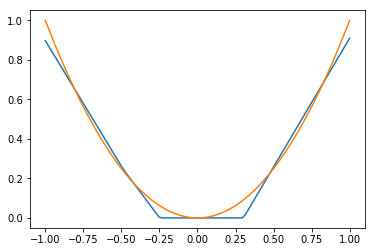

In [305]:
plt.plot(T,N_pred)
plt.plot(T,N)